# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# TODO: DONE: Load in the general demographics data.
azdias = pd.read_csv("Udacity_AZDIAS_Subset.csv", sep=";")

# TODO: DONE: Load in the feature summary file.
feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv", sep=";")

In [3]:
# TODO: DONE: Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

In [4]:
azdias.shape

(891221, 85)

In [5]:
azdias.head(10)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [6]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [7]:
feat_info.shape

(85, 4)

In [8]:
feat_info.head(10)

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [9]:
feat_info.describe()

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,KBA05_ANTG3,person,ordinal,[-1]
freq,1,43,49,26


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [10]:
# TODO: DONE: Identify missing or unknown data values and convert them to NaNs

In [11]:
# Convert missing value codes to NaNs
def convert_to_nan(data):    
    col_headers = list(data.columns.values)

    for index, header in enumerate(col_headers):
        # parse string 
        missing_unknown_list = feat_info['missing_or_unknown'][index].strip('][').split(',')

        for index, val in enumerate(missing_unknown_list):
            # convert to integers
            if val.lstrip('-').isdigit():
                missing_unknown_list[index] = int(val)
        # replace missing or unknown with NaN
        data[header].replace(missing_unknown_list, np.nan, inplace=True)
    
    return data


In [12]:
azdias_copy = azdias.copy()

In [13]:
# Before converting missing or unknown to NaNs
azdias_copy.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [14]:
azdias_converted = convert_to_nan(azdias_copy)

# After converting missing or unknown to NaNs
azdias_converted.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [15]:
# TODO: DONE: Perform an assessment of how much missing data there is in each column of the
# dataset.

In [16]:
azdias_original_missing = azdias.isnull().sum()
azdias_original_missing

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [17]:
azdias_original_missing.sum()

4896838

There are 4,896,838 missing values in the original data. 

In [18]:
azdias_converted_n_missing = azdias_converted.isnull().sum()
azdias_converted_n_missing

AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [19]:
azdias_converted_n_missing.sum()

8373929

There are 8,373,929 missing values in the clean dataset. This is about 11% of the total number of datapoints (75 million), which is fairly reasonable.

In [20]:
(azdias_converted_n_missing - azdias_original_missing).sum()

3477091

Cleaning the data surfaced an additional 3,477,091 missing data points.

In [21]:
# TODO: DONE: Investigate patterns in the amount of missing data in each column.

In [22]:
azdias_converted_n_missing.describe()

count        85.000000
mean      98516.811765
std      146604.203317
min           0.000000
25%           0.000000
50%       93148.000000
75%      116515.000000
max      889061.000000
dtype: float64

Missing values in each column range from 0 to almost 900,000.

In [23]:
# Convert number of missing values into percent before plotting
azdias_percent_missing = (azdias_converted_n_missing / len(azdias_converted)) * 100
azdias_percent_missing

AGER_TYP                 76.955435
ALTERSKATEGORIE_GROB      0.323264
ANREDE_KZ                 0.000000
CJT_GESAMTTYP             0.544646
FINANZ_MINIMALIST         0.000000
FINANZ_SPARER             0.000000
FINANZ_VORSORGER          0.000000
FINANZ_ANLEGER            0.000000
FINANZ_UNAUFFAELLIGER     0.000000
FINANZ_HAUSBAUER          0.000000
FINANZTYP                 0.000000
GEBURTSJAHR              44.020282
GFK_URLAUBERTYP           0.544646
GREEN_AVANTGARDE          0.000000
HEALTH_TYP               12.476816
LP_LEBENSPHASE_FEIN      10.954859
LP_LEBENSPHASE_GROB      10.611509
LP_FAMILIE_FEIN           8.728699
LP_FAMILIE_GROB           8.728699
LP_STATUS_FEIN            0.544646
LP_STATUS_GROB            0.544646
NATIONALITAET_KZ         12.153551
PRAEGENDE_JUGENDJAHRE    12.136608
RETOURTYP_BK_S            0.544646
SEMIO_SOZ                 0.000000
SEMIO_FAM                 0.000000
SEMIO_REL                 0.000000
SEMIO_MAT                 0.000000
SEMIO_VERT          

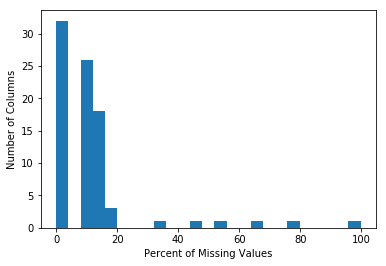

In [24]:
plt.hist(azdias_percent_missing, bins=25)
plt.ylabel('Number of Columns')
plt.xlabel('Percent of Missing Values')
plt.show()

In [25]:
# TODO: DONE: Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

In [26]:
azdias_missing_index = azdias_percent_missing[azdias_percent_missing > 20].index
azdias_missing_index  

Index(['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP',
       'KBA05_BAUMAX'],
      dtype='object')

In [27]:
azdias_missing_filtered = azdias_converted.drop(azdias_missing_index, axis=1, inplace=False)
azdias_missing_filtered.shape

(891221, 79)

In [28]:
# Initial dimensions of data with NaNs removed
azdias_converted.shape

(891221, 85)

#### Discussion 1.1.2: Assess Missing Data in Each Column

TODO: DONE: Report your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)

##### Summary

The number of missing values range from 0 to 889061, with an average of 98516.

We've filtered out the columns with more than 20% missing values - those appear to be the columns with outlier numbers of missing values as most of the columns appear to cluster around less than 20% missing values. 

The columns removed were the following: 'AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP','KBA05_BAUMAX'

Referencing back to our feature metadata, it looks like the columns with a high number of missing values tend to relate to more personal features such as age and year of birth grouped under "person" and "household" categories. Perhaps people were less likely to share these types of personal information.

In [29]:
# Copy of features metadata
feat_info_copy = feat_info.copy()
feat_info_copy.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [30]:
# Feature metadata of the removed columns
feat_info_copy.loc[feat_info_copy['attribute'].isin(azdias_missing_index)]

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
11,GEBURTSJAHR,person,numeric,[0]
40,TITEL_KZ,person,categorical,"[-1,0]"
43,ALTER_HH,household,interval,[0]
47,KK_KUNDENTYP,household,categorical,[-1]
64,KBA05_BAUMAX,microcell_rr3,mixed,"[-1,0]"


In [31]:
# Indexes of columns removed with the percentage of values missing
azdias_removed = azdias_percent_missing[azdias_percent_missing > 20]
azdias_removed

AGER_TYP        76.955435
GEBURTSJAHR     44.020282
TITEL_KZ        99.757636
ALTER_HH        34.813699
KK_KUNDENTYP    65.596749
KBA05_BAUMAX    53.468668
dtype: float64

In [32]:
# Raw data of columns removed
azdias_columns_removed = azdias_converted[azdias_missing_index]
azdias_columns_removed.head(10)

,AGER_TYP,GEBURTSJAHR,TITEL_KZ,ALTER_HH,KK_KUNDENTYP,KBA05_BAUMAX
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1996.0,NaN,NaN,NaN,5.0
2,NaN,1979.0,NaN,17.0,NaN,NaN
3,2.0,1957.0,NaN,13.0,NaN,1.0
4,NaN,1963.0,NaN,20.0,1.0,NaN
5,3.0,1943.0,NaN,10.0,3.0,NaN
6,NaN,NaN,NaN,NaN,NaN,1.0
7,NaN,1964.0,NaN,14.0,NaN,NaN
8,NaN,1974.0,NaN,16.0,NaN,NaN
9,NaN,1975.0,NaN,17.0,6.0,NaN


#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [33]:
# TODO: DONE: How much data is missing in each row of the dataset?
azdias_missing_rows = azdias_missing_filtered.isnull().sum(axis=1)
azdias_missing_rows

0         43
1          0
2          0
3          7
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11        47
12         6
13         8
14        47
15         8
16         6
17        47
18         3
19         0
20        10
21         0
22         0
23         8
24        47
25         5
26        19
27         0
28         0
29         2
          ..
891191     0
891192     0
891193     0
891194     0
891195     0
891196     0
891197     0
891198     0
891199     0
891200     0
891201     0
891202     0
891203    14
891204     0
891205     0
891206     0
891207     0
891208     3
891209     0
891210     0
891211     0
891212     0
891213     0
891214     0
891215     0
891216     3
891217     4
891218     5
891219     0
891220     0
Length: 891221, dtype: int64

In [34]:
azdias_missing_rows.describe()

count    891221.000000
mean          5.649894
std          13.234687
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          49.000000
dtype: float64

In [35]:
azdias_missing_rows_pct = (azdias_missing_rows / len(azdias_missing_filtered.columns)) * 100
azdias_missing_rows_pct

0         54.430380
1          0.000000
2          0.000000
3          8.860759
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
9          0.000000
10         0.000000
11        59.493671
12         7.594937
13        10.126582
14        59.493671
15        10.126582
16         7.594937
17        59.493671
18         3.797468
19         0.000000
20        12.658228
21         0.000000
22         0.000000
23        10.126582
24        59.493671
25         6.329114
26        24.050633
27         0.000000
28         0.000000
29         2.531646
            ...    
891191     0.000000
891192     0.000000
891193     0.000000
891194     0.000000
891195     0.000000
891196     0.000000
891197     0.000000
891198     0.000000
891199     0.000000
891200     0.000000
891201     0.000000
891202     0.000000
891203    17.721519
891204     0.000000
891205     0.000000
891206     0.000000
891207     0.000000
891208     3.797468
891209     0.000000


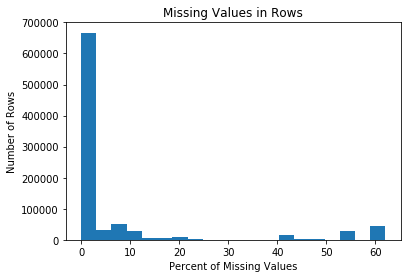

In [36]:
plt.hist(azdias_missing_rows_pct, bins=20)
plt.ylabel('Number of Rows')
plt.xlabel('Percent of Missing Values')
plt.title('Missing Values in Rows')
plt.show()

It appears that most of the rows cluster between 0 to less than 30% missing values. The outliers seem to be rows with greater than 40% missing values and a max at around 60%. The number of missing values in each row range from 0 to 49.

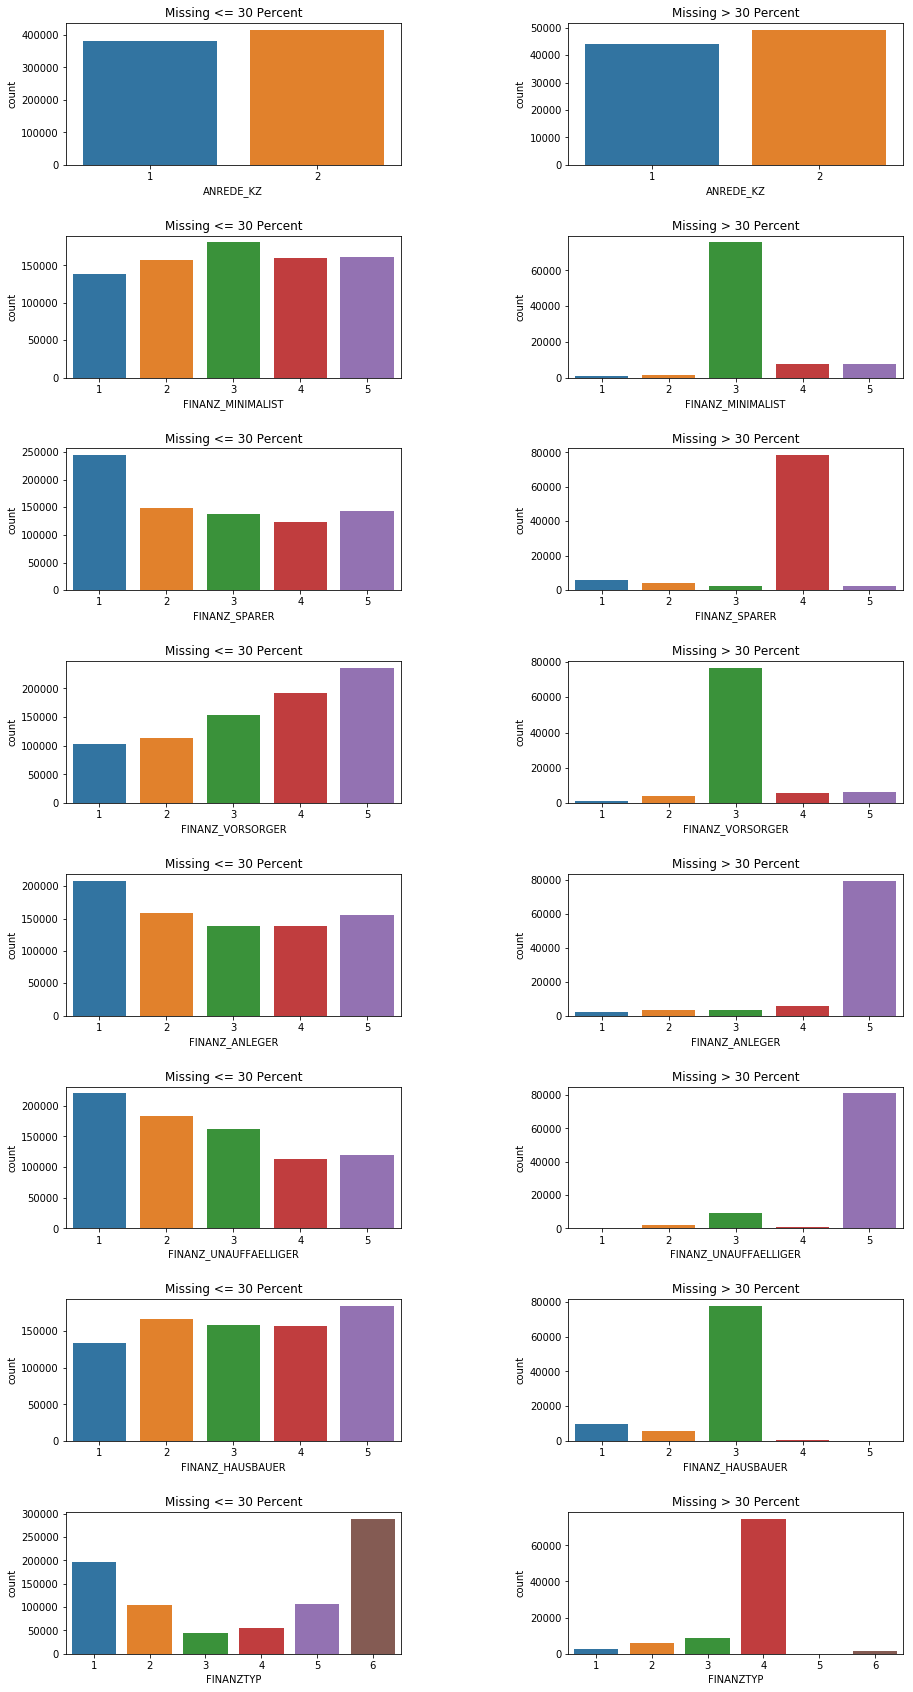

In [37]:
# TODO: DONE: Write code to divide the data into two subsets based on the number of missing
# values in each row.

# Divide rows into 2 groups: less than or equal to 30% and greater than 30%.
azdias_missing_rows_lte_30 = azdias_missing_filtered[azdias_missing_rows_pct <= 30]
azdias_missing_rows_gt_30 = azdias_missing_filtered[azdias_missing_rows_pct > 30]

# TODO: DONE: Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

# Get columns missing < 5 values
cols_missing_values_count = azdias_missing_filtered.isnull().sum()
cols_missing_few = cols_missing_values_count[cols_missing_values_count < 5].index

# Display distributions of missing values for several columns
# for rows missing <= 30 values and rows missing > 30 values
def display_column_dist(columns, num_cols):
    fig, axs = plt.subplots(num_cols, 2, figsize=(15, 30), facecolor='white', edgecolor='black')
    fig.subplots_adjust(hspace=.5 , wspace=.5)
    axs = axs.ravel()
    
    for i in range(num_cols):
        sns.countplot(azdias_missing_rows_lte_30[cols_missing_few[i]], ax=axs[i*2])
        axs[i*2].title.set_text('Missing <= 30 Percent')
        
        sns.countplot(azdias_missing_rows_gt_30[cols_missing_few[i]], ax=axs[i*2+1])
        axs[i*2+1].title.set_text('Missing > 30 Percent')
        
display_column_dist(cols_missing_few, 8)


In [38]:
# Get indexes of row with high percentage of missing values
azdias_missing_rows_index = azdias_missing_rows_pct[azdias_missing_rows_pct > 30].index

# Filter data to remove rows with high percentage of missing values
azdias_missing_rows_cols_filtered = azdias_missing_filtered[~azdias_missing_filtered.index.isin(azdias_missing_rows_index)]

print('data before removing high missing value rows: ', azdias_missing_filtered.shape)
print('data after removing high missing value rows: ', azdias_missing_rows_cols_filtered.shape)


data before removing high missing value rows:  (891221, 79)
data after removing high missing value rows:  (797837, 79)


#### Discussion 1.1.3: Assess Missing Data in Each Row

TODO: DONE: Report your observations regarding missing data in rows. Are the data with lots of missing values are qualitatively different from data with few or no missing values?

The distribution of missing values across the 8 features for missing values less than and equal to 30% and greater than 30% were different in most cases except for Anrede_kz. This suggests that removing the rows with missing values greater than 30% may affect the outcome of the training and prediction. However, since most of the rows are missing <= 30% of the values, I decided to remove those rows with greater than 30% missing values.


### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [39]:
# TODO: DONE: How many features are there of each data type?
feat_info.type.value_counts()


ordinal        49
categorical    21
numeric         7
mixed           7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [40]:
azdias_filtered_rows_cols = azdias_missing_rows_cols_filtered.copy()

In [41]:
# TODO: DONE: Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

categorical_features = feat_info[feat_info["type"]=="categorical"].attribute
azdias_filtered_cat_features = list(set(categorical_features).intersection(list(azdias_filtered_rows_cols.columns)))

features_to_encode = []
multi_features = []

for feature in azdias_filtered_cat_features:
    isBinary = len(azdias_filtered_rows_cols[feature].unique()) == 2
    isNumeric = azdias_filtered_rows_cols[feature].dtype != "object"
    if isBinary and not isNumeric:
        features_to_encode.append(feature)
    else:
        multi_features.append(feature)

print('multi-level categoricals: \n', multi_features)
print('\nfeatures to encode - binary and not numeric: \n', features_to_encode)


multi-level categoricals: 
 ['CAMEO_DEUG_2015', 'NATIONALITAET_KZ', 'GFK_URLAUBERTYP', 'CAMEO_DEU_2015', 'ANREDE_KZ', 'LP_STATUS_FEIN', 'VERS_TYP', 'FINANZTYP', 'ZABEOTYP', 'CJT_GESAMTTYP', 'SOHO_KZ', 'LP_FAMILIE_GROB', 'GREEN_AVANTGARDE', 'GEBAEUDETYP', 'LP_FAMILIE_FEIN', 'LP_STATUS_GROB', 'SHOPPER_TYP']

features to encode - binary and not numeric: 
 ['OST_WEST_KZ']


In [42]:
# TODO: DONE: Re-encode categorical variable(s) to be kept in the analysis.

# Re-encode the column that has categorical, binary values that are non-numeric - OST_WEST_KZ
east_west_map = {'W': 0, 'O': 1}
azdias_ost_west_encoded = azdias_filtered_rows_cols.replace({'OST_WEST_KZ': east_west_map})

print('before dropped multi-level categoricals: ', azdias_ost_west_encoded.shape)
# Drop the mult-level categoricals to simplify
azdias_clean = azdias_ost_west_encoded.drop(multi_features, axis=1, inplace=False)
print('after dropped multi-level categoricals: ', azdias_clean.shape)

before dropped multi-level categoricals:  (797837, 79)
after dropped multi-level categoricals:  (797837, 62)


#### Discussion 1.2.1: Re-Encode Categorical Features

#TODO: DONE: Report your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

I kept the columns with binary values, decided to drop the multi-level categoricals to simplify the data and re-encoded the column with with categorical, non-numeric, binary values (OST_WEST_KZ) to be 1 and 0.


#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [43]:
azdias_clean_mixed_type_engineered = azdias_clean.copy()

In [44]:
# TODO: DONE: Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

# Investigate
azdias_clean_mixed_type_engineered['PRAEGENDE_JUGENDJAHRE'].head(10)

1     14.0
2     15.0
3      8.0
4      8.0
5      3.0
6     10.0
7      8.0
8     11.0
9     15.0
10     3.0
Name: PRAEGENDE_JUGENDJAHRE, dtype: float64

In [45]:
azdias_clean_mixed_type_engineered['PRAEGENDE_JUGENDJAHRE'].describe()

count    769164.000000
mean          9.279929
std           4.026149
min           1.000000
25%           6.000000
50%           9.000000
75%          14.000000
max          15.000000
Name: PRAEGENDE_JUGENDJAHRE, dtype: float64

In [46]:
azdias_clean_mixed_type_engineered['PRAEGENDE_JUGENDJAHRE'].value_counts()

14.0    182951
8.0     141590
10.0     85790
5.0      84679
3.0      53838
15.0     42533
11.0     35744
9.0      33568
6.0      25652
12.0     24445
1.0      20674
4.0      20450
2.0       7479
13.0      5762
7.0       4009
Name: PRAEGENDE_JUGENDJAHRE, dtype: int64

In [47]:
# Create new variable PRAEGENDE_JUGENDJAHRE_DECADE
# https://www.geeksforgeeks.org/python-pandas-apply/

def build_interval(orig_code):
    if orig_code in [1, 2]:
        return 1
    elif orig_code in [3, 4]:
        return 2
    elif orig_code in [5, 6, 7]:
        return 3
    elif orig_code in [8, 9]:
        return 4
    elif orig_code in [10, 11, 12, 13]:
        return 5
    elif orig_code in [14, 15]:
        return 6
    else: 
        return np.nan


In [48]:
azdias_clean_mixed_type_engineered['PRAEGENDE_JUGENDJAHRE_DECADE'] = azdias_clean_mixed_type_engineered['PRAEGENDE_JUGENDJAHRE'].apply(build_interval)


In [49]:
# Create new variable PRAEGENDE_JUGENDJAHRE_MOVEMENT
def build_movement(orig_code):
    if orig_code in [1, 3, 5, 8, 10, 12, 14]:
        return 0
    elif orig_code in [2, 4, 6, 7, 9, 11, 13, 15]:
        return 1
    else: 
        return np.nan


In [50]:
azdias_clean_mixed_type_engineered['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = azdias_clean_mixed_type_engineered['PRAEGENDE_JUGENDJAHRE'].apply(build_movement)
azdias_clean_mixed_type_engineered['PRAEGENDE_JUGENDJAHRE_MOVEMENT'].head()



1    0.0
2    1.0
3    0.0
4    0.0
5    0.0
Name: PRAEGENDE_JUGENDJAHRE_MOVEMENT, dtype: float64

In [51]:
azdias_clean_mixed_type_engineered['PRAEGENDE_JUGENDJAHRE_MOVEMENT'].head()

1    0.0
2    1.0
3    0.0
4    0.0
5    0.0
Name: PRAEGENDE_JUGENDJAHRE_MOVEMENT, dtype: float64

In [52]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

azdias_clean_mixed_type_engineered['CAMEO_INTL_2015'].head()

1    51
2    24
3    12
4    43
5    54
Name: CAMEO_INTL_2015, dtype: object

In [53]:
azdias_clean_mixed_type_engineered['CAMEO_INTL_2015'].describe()

count     791768
unique        21
top           51
freq      133691
Name: CAMEO_INTL_2015, dtype: object

In [54]:
azdias_clean_mixed_type_engineered['CAMEO_INTL_2015'].value_counts()

51    133691
41     92336
24     91145
14     62877
43     56669
54     45388
25     39619
22     33146
23     26728
13     26330
45     26132
55     23953
52     20542
31     19009
34     18522
15     16974
44     14820
12     13244
35     10355
32     10354
33      9934
Name: CAMEO_INTL_2015, dtype: int64

In [55]:
# Create new variable CAMEO_INTL_2015_WEALTH
def build_wealth(orig_code):
    if pd.isna(orig_code):
        return np.nan
    else:
        return int(orig_code) // 10

In [56]:
azdias_clean_mixed_type_engineered['CAMEO_INTL_2015_WEALTH'] = azdias_clean_mixed_type_engineered['CAMEO_INTL_2015'].apply(build_wealth)

azdias_clean_mixed_type_engineered['CAMEO_INTL_2015_WEALTH'].head()


1    5.0
2    2.0
3    1.0
4    4.0
5    5.0
Name: CAMEO_INTL_2015_WEALTH, dtype: float64

In [57]:
# Create new variable CAMEO_INTL_2015_LIFE_STAGE
def build_life_stage(orig_code):
    if pd.isna(orig_code):
        return np.nan
    else:
        return int(orig_code) % 10

In [58]:
azdias_clean_mixed_type_engineered['CAMEO_INTL_2015_LIFE_STAGE'] = azdias_clean_mixed_type_engineered['CAMEO_INTL_2015'].apply(build_life_stage)

azdias_clean_mixed_type_engineered['CAMEO_INTL_2015_LIFE_STAGE'].head()


1    1.0
2    4.0
3    2.0
4    3.0
5    4.0
Name: CAMEO_INTL_2015_LIFE_STAGE, dtype: float64

In [59]:
# Get mixed features

mixed_features = feat_info[feat_info["type"]=="mixed"].attribute

azdias_mixed_features = list(set(mixed_features).intersection(list(azdias_clean_mixed_type_engineered.columns)))

print('all mixed features: \n', azdias_mixed_features)

all mixed features: 
 ['CAMEO_INTL_2015', 'WOHNLAGE', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PLZ8_BAUMAX', 'PRAEGENDE_JUGENDJAHRE']


In [60]:
# Drop mixed features - including the original two that we engineered (we keep the new variables)
print('dimensions before drop: ', azdias_clean_mixed_type_engineered.shape)
azdias_cleaned_engineered = azdias_clean_mixed_type_engineered.drop(azdias_mixed_features, axis=1, inplace=False)
print('dimensions after drop: ', azdias_cleaned_engineered.shape)

dimensions before drop:  (797837, 66)
dimensions after drop:  (797837, 60)


#### Discussion 1.2.2: Engineer Mixed-Type Features

TODO: DONE: Report your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?

I engineered PRAEGENDE_JUGENDJAHRE, subdividing it to the new variables decade and movement and CAMEO_INTL_2015 to wealth and life stage and dropped the remaining mixed variables.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [61]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)


In [62]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [159]:
def convert_to_nan(data):    
    col_headers = list(data.columns.values)

    for index, header in enumerate(col_headers):
        # parse string 
        missing_unknown_list = feat_info['missing_or_unknown'][index].strip('][').split(',')

        for index, val in enumerate(missing_unknown_list):
            # convert to integers
            if val.lstrip('-').isdigit():
                missing_unknown_list[index] = int(val)
        # replace missing or unknown with nan
        data[header].replace(missing_unknown_list, np.nan, inplace=True)
    
    return data

# Create new variable CAMEO_INTL_2015_WEALTH
def build_wealth(orig_code):
    if pd.isna(orig_code):
        return np.nan
    else:
        return int(orig_code) // 10

# Create new variable CAMEO_INTL_2015_LIFE_STAGE
def build_life_stage(orig_code):
    if pd.isna(orig_code):
        return np.nan
    else:
        return int(orig_code) % 10

# Create new variable PRAEGENDE_JUGENDJAHRE_DECADE
def build_interval(orig_code):
    if orig_code in [1, 2]:
        return 1
    elif orig_code in [3, 4]:
        return 2
    elif orig_code in [5, 6, 7]:
        return 3
    elif orig_code in [8, 9]:
        return 4
    elif orig_code in [10, 11, 12, 13]:
        return 5
    elif orig_code in [14, 15]:
        return 6
    else: 
        return np.nan

# Create new variable PRAEGENDE_JUGENDJAHRE_MOVEMENT
def build_movement(orig_code):
    if orig_code in [1, 3, 5, 8, 10, 12, 14]:
        return 0
    elif orig_code in [2, 4, 6, 7, 9, 11, 13, 15]:
        return 1
    else: 
        return np.nan


In [160]:
def clean_data(df, drop_thresholds):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    # convert missing value codes into NaNs
    data_converted_to_nan = convert_to_nan(df)

    # remove selected columns of missing values
    missing_value_sums_cols =  data_converted_to_nan.isnull().sum()
    missing_value_percents_cols = (missing_value_sums_cols / len(data_converted_to_nan)) * 100
    missing_values_indexes = missing_value_percents_cols[missing_value_percents_cols > drop_thresholds[0]].index
    filtered_missing_values_cols_df = data_converted_to_nan.drop(missing_values_indexes, axis=1, inplace=False)  

    # remove selected rows of missing values
    missing_value_sums_rows = filtered_missing_values_cols_df.isnull().sum(axis=1)
    missing_value_percents_rows = (missing_value_sums_rows / len(filtered_missing_values_cols_df.columns)) * 100
    missing_values_rows_index = missing_value_percents_rows[missing_value_percents_rows > drop_thresholds[1]].index
    filtered_missing_values_cols_rows_df = filtered_missing_values_cols_df[~filtered_missing_values_cols_df.index.isin(missing_values_rows_index)]

    # select, re-encode, and engineer column values
    categorical_features = feat_info[feat_info["type"]=="categorical"].attribute
    filtered_cat_features = list(set(categorical_features).intersection(list(filtered_missing_values_cols_rows_df.columns)))
    features_to_encode = []
    multi_features = []

    for feature in filtered_cat_features:
        isBinary = len(filtered_missing_values_cols_rows_df[feature].unique()) == 2
        isNumeric = filtered_missing_values_cols_rows_df[feature].dtype != "object"
        if isBinary and not isNumeric:
            features_to_encode.append(feature)
        else:
            multi_features.append(feature)
            
    east_west_map = {'W': 0, 'O': 1}
    east_west_encoded_df = filtered_missing_values_cols_rows_df.replace({'OST_WEST_KZ': east_west_map})
    dropped_multi_level_df = east_west_encoded_df.drop(multi_features, axis=1, inplace=False)

    if 'PRAEGENDE_JUGENDJAHRE' in dropped_multi_level_df.columns:
        dropped_multi_level_df['PRAEGENDE_JUGENDJAHRE_DECADE'] = dropped_multi_level_df['PRAEGENDE_JUGENDJAHRE'].apply(build_interval)
        dropped_multi_level_df['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = dropped_multi_level_df['PRAEGENDE_JUGENDJAHRE'].apply(build_movement)
        dropped_multi_level_df['CAMEO_INTL_2015_WEALTH'] = dropped_multi_level_df['CAMEO_INTL_2015'].apply(build_wealth)
        dropped_multi_level_df['CAMEO_INTL_2015_LIFE_STAGE'] = dropped_multi_level_df['CAMEO_INTL_2015'].apply(build_life_stage)
    
    all_mixed_feature_names = feat_info[feat_info["type"]=="mixed"].attribute
    filtered_mixed_feature_names = list(set(all_mixed_feature_names).intersection(list(dropped_multi_level_df.columns)))
    cleaned_engineered_data_df = dropped_multi_level_df.drop(filtered_mixed_feature_names, axis=1, inplace=False)

    return cleaned_engineered_data_df
    

In [161]:
azdias_copy_2 = azdias.copy()
azdias_copy_2.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [162]:
processed_data_df = clean_data(azdias_copy_2, (20, 30))
print('data before cleaning: ', azdias_copy_2.shape)
print('data after cleaning: ', processed_data_df.shape)

data before cleaning:  (891221, 85)
data after cleaning:  (797837, 60)


Shape of data after cleaning matches end result in previous steps: azdias_cleaned_engineered

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [163]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
azdias_imputed = imputer.fit_transform(azdias_cleaned_engineered)
azdias_imputed_df = pd.DataFrame(azdias_imputed, columns=list(azdias_cleaned_engineered.columns))
azdias_imputed_df.head()

,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
0,1.0,1.0,5.0,2.0,5.0,4.0,5.0,3.0,1.0,5.0,...,1.0,5.0,4.0,3.0,5.0,4.0,6.0,0.0,5.0,1.0
1,3.0,1.0,4.0,1.0,2.0,3.0,5.0,3.0,3.0,4.0,...,0.0,4.0,4.0,3.0,5.0,2.0,6.0,1.0,2.0,4.0
2,4.0,4.0,2.0,5.0,2.0,1.0,2.0,2.0,2.0,5.0,...,0.0,3.0,4.0,2.0,3.0,3.0,4.0,0.0,1.0,2.0
3,3.0,4.0,3.0,4.0,1.0,3.0,2.0,3.0,5.0,6.0,...,1.0,3.0,3.0,4.0,6.0,5.0,4.0,0.0,4.0,3.0
4,1.0,3.0,1.0,5.0,2.0,2.0,5.0,3.0,3.0,2.0,...,1.0,5.0,5.0,2.0,3.0,3.0,2.0,0.0,5.0,4.0


In [164]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
azdias_scaled = scaler.fit_transform(azdias_imputed)
azdias_scaled_df = pd.DataFrame(azdias_scaled, columns=list(azdias_imputed_df.columns))
azdias_scaled_df.head()

,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
0,-1.766591,-1.494575,1.537983,-1.040685,1.466063,0.958965,1.339139,1.096479,-1.686175,0.443042,...,0.406674,1.430396,0.574142,-0.166473,-0.127090,0.684827,1.172887,-0.53045,1.186152,-1.266908
1,0.200523,-1.494575,0.864621,-1.766949,-0.570955,0.244386,1.339139,1.096479,-0.307620,-0.072169,...,-0.985515,0.390829,0.574142,-0.166473,-0.127090,-0.789074,1.172887,1.88519,-0.868184,0.761244
2,1.184079,0.683195,-0.482102,1.138107,-0.570955,-1.184772,-0.791524,-0.257090,-0.996898,0.443042,...,-0.985515,-0.648737,0.574142,-1.169993,-0.997615,-0.052124,-0.223434,-0.53045,-1.552963,-0.590858
3,0.200523,0.683195,0.191259,0.411843,-1.249961,0.244386,-0.791524,1.096479,1.070934,0.958253,...,0.406674,-0.648737,-0.337246,0.837048,0.308172,1.421778,-0.223434,-0.53045,0.501373,0.085193
4,-1.766591,-0.042728,-1.155464,1.138107,-0.570955,-0.470193,1.339139,1.096479,-0.307620,-1.102591,...,0.406674,1.430396,1.485530,-1.169993,-0.997615,-0.052124,-1.619755,-0.53045,1.186152,0.761244


### Discussion 2.1: Apply Feature Scaling

TODO: DONE: Report your decisions regarding feature scaling.

I chose StandardScalar which transforms data to have a mean of 0 and standard deviation of 1. 

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [165]:
# Apply PCA to the data.
from sklearn.decomposition import PCA

pca = PCA() 
X_pca = pca.fit_transform(azdias_scaled)

print(X_pca)
print(X_pca.shape)

[[ 3.86688358 -2.82038599 -2.52173015 ...,  0.26798435  0.08448105
  -0.15274845]
 [-0.71743479  0.04085403 -3.06594581 ...,  0.78822338 -0.0202241
   0.08620284]
 [-3.94795925  1.1676942  -0.4518593  ..., -0.51197351 -0.01128059
  -0.1894097 ]
 ..., 
 [-0.99031451 -3.56186236 -2.39793732 ..., -0.11564245 -0.04952367
   0.16902092]
 [ 5.88064866 -3.10655057  2.3386828  ..., -0.0944886   0.2406808
  -0.32456913]
 [-0.79424233  1.37468307  2.88887186 ...,  0.29951092  0.58587503
  -0.68969232]]
(797837, 60)


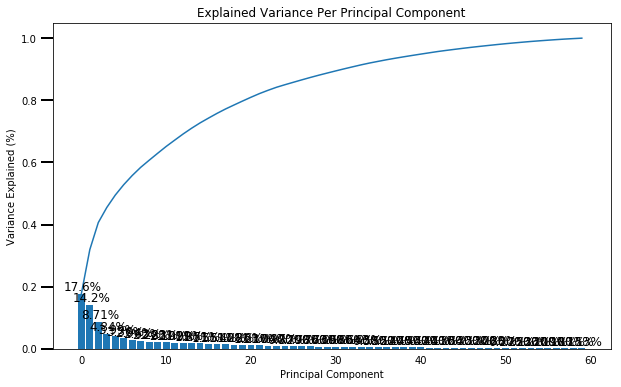

In [166]:
# Investigate the variance accounted for by each principal component.

def scree_plot(pca):
    
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

scree_plot(pca)

In [167]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca_20 = PCA(n_components=20) 
azdias_pca_20 = pca_20.fit_transform(azdias_scaled)

### Discussion 2.2: Perform Dimensionality Reduction

TODO: DONE: Report your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?

I've chosen to retain 20 principal components because it reduces the number of components by two-thirds and still captures roughly 80% of variability.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [168]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

def map_pca_weights(pca, scaled_df, index):
    scaled_df_columns = scaled_df.columns
    pca_df = pd.DataFrame(pca.components_, columns=list(scaled_df_columns))
    pca_weights = pca_df.iloc[index].sort_values(ascending=False)
    
    return pca_weights


pca_0 = map_pca_weights(pca_20, azdias_scaled_df, 0)
pca_0


PLZ8_ANTG3                        0.229398
PLZ8_ANTG4                        0.222365
CAMEO_INTL_2015_WEALTH            0.206525
ORTSGR_KLS9                       0.202683
EWDICHTE                          0.200802
HH_EINKOMMEN_SCORE                0.200024
FINANZ_HAUSBAUER                  0.160895
PLZ8_ANTG2                        0.156727
KBA05_ANTG4                       0.156152
FINANZ_SPARER                     0.146330
ARBEIT                            0.145822
RELAT_AB                          0.138156
KBA05_ANTG3                       0.138064
ANZ_HAUSHALTE_AKTIV               0.137194
SEMIO_PFLICHT                     0.115198
SEMIO_REL                         0.113540
PRAEGENDE_JUGENDJAHRE_DECADE      0.100328
SEMIO_RAT                         0.093830
SEMIO_TRADV                       0.089364
SEMIO_MAT                         0.079944
SEMIO_FAM                         0.079845
FINANZ_UNAUFFAELLIGER             0.074799
SEMIO_KULT                        0.074154
FINANZ_ANLE

In [169]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

pca_1 = map_pca_weights(pca_20, azdias_scaled_df, 1)
pca_1



ALTERSKATEGORIE_GROB              0.265200
FINANZ_VORSORGER                  0.238408
SEMIO_ERL                         0.219949
SEMIO_LUST                        0.187525
RETOURTYP_BK_S                    0.170345
W_KEIT_KIND_HH                    0.125243
FINANZ_HAUSBAUER                  0.115420
SEMIO_KRIT                        0.098654
EWDICHTE                          0.094558
PLZ8_ANTG3                        0.094425
ORTSGR_KLS9                       0.093179
SEMIO_KAEM                        0.091884
PLZ8_ANTG4                        0.090266
CAMEO_INTL_2015_WEALTH            0.076231
FINANZ_MINIMALIST                 0.074785
KBA05_ANTG4                       0.073473
ARBEIT                            0.069661
RELAT_AB                          0.066943
PLZ8_ANTG2                        0.065295
ANZ_HAUSHALTE_AKTIV               0.064740
WOHNDAUER_2008                    0.062286
HH_EINKOMMEN_SCORE                0.055635
SEMIO_DOM                         0.052138
KBA05_ANTG3

In [170]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

pca_2 = map_pca_weights(pca_20, azdias_scaled_df, 2)
pca_2

SEMIO_VERT                        0.375283
SEMIO_SOZ                         0.293032
SEMIO_FAM                         0.285452
SEMIO_KULT                        0.270798
FINANZ_MINIMALIST                 0.164778
RETOURTYP_BK_S                    0.102874
SEMIO_REL                         0.099848
FINANZ_VORSORGER                  0.092330
W_KEIT_KIND_HH                    0.089690
SEMIO_MAT                         0.077537
ALTERSKATEGORIE_GROB              0.058661
SEMIO_LUST                        0.054342
PRAEGENDE_JUGENDJAHRE_MOVEMENT    0.048804
PLZ8_ANTG4                        0.036477
ORTSGR_KLS9                       0.035293
PLZ8_ANTG3                        0.035139
EWDICHTE                          0.034544
WOHNDAUER_2008                    0.032863
ARBEIT                            0.028257
RELAT_AB                          0.024480
PLZ8_ANTG2                        0.022621
KBA05_ANTG4                       0.021965
CAMEO_INTL_2015_WEALTH            0.019971
ANZ_HAUSHAL

### Discussion 2.3: Interpret Principal Components

Report your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?

The first component is positively associated with data column relating to number of 6-10 family members house sizes in a region (PLZ8_ANTG4), density of households per square km (EWDICHTE), household income (HH_EINKOMMEN_SCORE) and negatively associated with the number of 1-2 family members house sizes in a region (PLZ8_ANTG1), movement patterns (MOBI_REGIO) and low financial interest (FINANZ_MINIMALIST).

The first component seems to emphasize data relating to finances, assets and household characteristics.

***

The second component is positively correlated with age (ALTERSKATEGORIE_GROB), financial preparedness (FINANZ_VORSORGER), and how event-oriented a person is (SEMIO_ERL) and negatively associated with data relating to money-saver (FINANZ_SPARER), religion (SEMIO_REL) and dominating movement of a person's youth - avant-guard vs main stream, east/west (PRAEGENDE_JUGENDJAHRE)

The second component highlights data relating to personality types.

***

The third component is positively associated with data relating to family-minded (SEMIO_FAM), socially-minded (SEMIO_SOZ), and culturally minded (SEMIO_KULT) and negatively associated with data relating to critical-minded (SEMIO_KRIT), dominant-minded (SEMIO_DOM) and combative attitude (SEMIO_KAEM). 

The third component focuses on data on a person's traits relating to the community/social.


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [171]:
# Over a number of different cluster counts...
# run k-means clustering on the data and...
# compute the average within-cluster distances. 

In [197]:
from sklearn.cluster import KMeans

def get_kmeans_score(num_of_clusters, data):
    kmeans = KMeans(n_clusters=num_of_clusters, random_state=0)
    kmeans_model = kmeans.fit(data)
    kmeans_model_score = np.abs(kmeans_model.score(data))

    return kmeans_model_score


kmeans_scores = []
n_clusters = list(range(1, 11))

for i in n_clusters:
    kmeans_score = get_kmeans_score(i, azdias_pca_20)
    kmeans_scores.append(kmeans_score)
    
print('kmeans_scores: ', kmeans_scores)



kmeans_scores:  [38175453.783456452, 31830829.169696525, 28559051.293600239, 26484825.075726196, 25353539.504137218, 24270456.843325894, 23355928.071523618, 22590643.255701009, 21825810.657555435, 21509102.918497771]


Text(0,0.5,'scores')

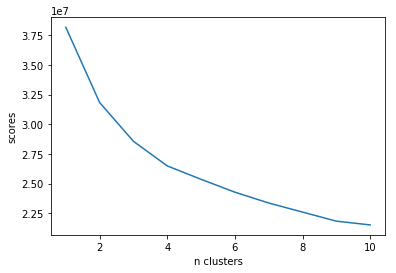

In [198]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

plt.plot(n_clusters, kmeans_scores)
plt.xlabel('n clusters')
plt.ylabel('scores')

In [172]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans_model_general_10 = kmeans.fit(azdias_pca_20)
kmeans_general_10_prediction = kmeans_model_general_10.predict(azdias_pca_20)
print(kmeans_general_10_prediction)

[2 3 0 ..., 3 6 1]


### Discussion 3.1: Apply Clustering to General Population

TODO: DONE: Report your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?

I chose 10 clusters because that was the number of clusters at which the improvement in scores started to plateau

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [173]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

In [174]:
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [175]:
customers.shape

(191652, 85)

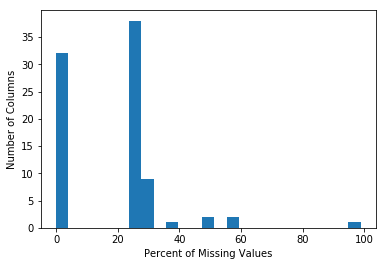

In [176]:
# Analysis on percent of missing values to determine threshold to drop columns
# Most of column data seems to have < 35% missing values
data_converted_to_nan = convert_to_nan(customers)

missing_value_sums_cols = data_converted_to_nan.isnull().sum()
missing_value_percents_cols = (missing_value_sums_cols / len(data_converted_to_nan)) * 100
 
plt.hist(missing_value_percents_cols, bins=25)
plt.ylabel('Number of Columns')
plt.xlabel('Percent of Missing Values')
plt.show()

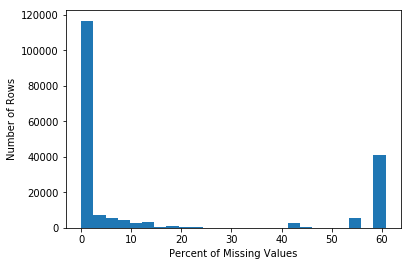

In [177]:
# Analysis on percent of missing values to determine threshold to drow rows
# Most of row data seems to have < 20% missing values

missing_values_indexes = missing_value_percents_cols[missing_value_percents_cols > 35].index
filtered_missing_values_cols_df = data_converted_to_nan.drop(missing_values_indexes, axis=1, inplace=False) 

missing_value_sums_rows = filtered_missing_values_cols_df.isnull().sum(axis=1)
missing_value_percents_rows = (missing_value_sums_rows / len(filtered_missing_values_cols_df.columns)) * 100

plt.hist(missing_value_percents_rows, bins=25)
plt.ylabel('Number of Rows')
plt.xlabel('Percent of Missing Values')
plt.show()

In [178]:
drop_thresholds = (35, 20)
customers_cleaned_engineered = clean_data(customers, drop_thresholds)
customers_cleaned_engineered.shape

(140898, 60)

In [179]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
from sklearn.preprocessing import Imputer

customers_imputed = imputer.transform(customers_cleaned_engineered)
customers_imputed_df = pd.DataFrame(customers_imputed, columns=list(customers_cleaned_engineered.columns))
customers_imputed_df.head()


,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
0,4.0,5.0,1.0,5.0,1.0,2.0,2.0,1.0,5.0,6.0,...,0.0,5.0,5.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0
1,4.0,5.0,1.0,5.0,1.0,4.0,4.0,2.0,5.0,2.0,...,1.0,3.0,2.0,3.0,5.0,3.0,2.0,1.0,3.0,4.0
2,4.0,5.0,1.0,5.0,2.0,1.0,2.0,2.0,3.0,6.0,...,0.0,3.0,4.0,1.0,3.0,1.0,1.0,0.0,2.0,4.0
3,3.0,3.0,1.0,4.0,4.0,5.0,2.0,3.0,5.0,4.0,...,1.0,3.0,3.0,3.0,5.0,1.0,4.0,0.0,4.0,1.0
4,3.0,5.0,1.0,5.0,1.0,2.0,3.0,3.0,3.0,6.0,...,1.0,5.0,5.0,3.0,7.0,5.0,2.0,1.0,3.0,4.0


In [180]:
customers_scaled = scaler.transform(customers_imputed)
customers_scaled_df = pd.DataFrame(customers_scaled, columns=list(customers_imputed_df.columns))
customers_scaled_df.head()

,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
0,1.184079,1.409119,-1.155464,1.138107,-1.249961,-0.470193,-0.791524,-1.610659,1.070934,0.958253,...,-0.985515,1.430396,1.485530,-2.173514,-1.432877,-1.526025,-1.619755,1.88519,-1.552963,0.085193
1,1.184079,1.409119,-1.155464,1.138107,-1.249961,0.958965,0.628918,-0.257090,1.070934,-1.102591,...,0.406674,-0.648737,-1.248633,-0.166473,-0.127090,-0.052124,-1.619755,1.88519,-0.183405,0.761244
2,1.184079,1.409119,-1.155464,1.138107,-0.570955,-1.184772,-0.791524,-0.257090,-0.307620,0.958253,...,-0.985515,-0.648737,0.574142,-2.173514,-0.997615,-1.526025,-2.317915,-0.53045,-0.868184,0.761244
3,0.200523,-0.042728,-1.155464,0.411843,0.787057,1.673543,-0.791524,1.096479,1.070934,-0.072169,...,0.406674,-0.648737,-0.337246,-0.166473,-0.127090,-1.526025,-0.223434,-0.53045,0.501373,-1.266908
4,0.200523,1.409119,-1.155464,1.138107,-1.249961,-0.470193,-0.081303,1.096479,-0.307620,0.958253,...,0.406674,1.430396,1.485530,-0.166473,0.743434,1.421778,-1.619755,1.88519,-0.183405,0.761244


In [181]:

customers_pca = pca_20.transform(customers_scaled)

kmeans_10_prediction_customers = kmeans_model_general_10.predict(customers_pca)
print(kmeans_10_prediction_customers)



[4 5 0 ..., 4 5 7]


### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [182]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

def get_proportions(kmeans_pred):
    proportions = []
    total = len(kmeans_pred)
    
    for i in range(10):
        cluster_size = (kmeans_pred == i).sum()
        proportions.append(cluster_size/total)

    return proportions

In [188]:
general_proportions = get_proportions(kmeans_general_10_prediction)
customers_proportions = get_proportions(kmeans_10_prediction_customers)
print(general_proportions)
print(customers_proportions)

[0.15519962097521173, 0.11595726946732227, 0.1046529554282391, 0.11910076870338177, 0.12986612553692045, 0.1244226577609211, 0.081674577639292242, 0.08998329232662812, 0.0040722603739861652, 0.075070471788097073]
[0.17574415534642082, 0.12030688867123734, 0.009737540632230408, 0.020269982540561258, 0.45466223793098554, 0.10418884583173643, 0.0093613819926471626, 0.033236809606949705, 0.019744779911709181, 0.052747377535522152]


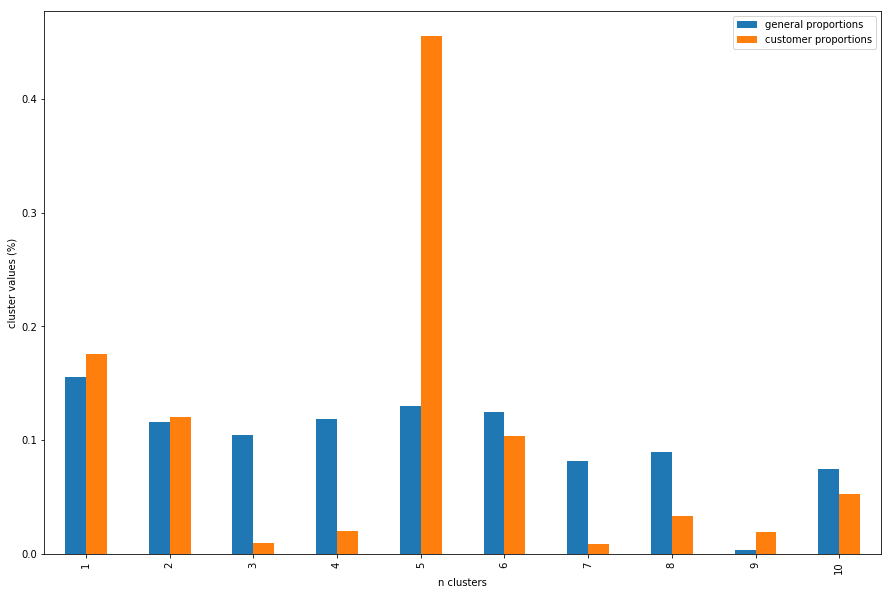

In [194]:
import seaborn as sns

axis_values = { 'n clusters': list(range(1,11)), 'general proportions': general_proportions, 'customer proportions': customers_proportions }
comparison_df = pd.DataFrame(axis_values)
comparison_df.shape
comparison_df.head()
comparison_df.plot(x='n clusters', y=['general proportions', 'customer proportions'], kind='bar', figsize=(15, 10))
plt.ylabel('cluster values (%)')
plt.show()

In [195]:
# Overrepresented cluster
cluster_5_indexes = np.where(kmeans_10_prediction_customers==4)
cluster_5_transformed = customers_pca[cluster_5_indexes]
cluster_5 = scaler.inverse_transform(pca_20.inverse_transform(cluster_5_transformed)).round()

cluster_5_df = pd.DataFrame(data=cluster_5, index=list(range(cluster_5.shape[0])), columns=customers_scaled_df.columns)
cluster_5_df.head(30)

,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
0,4.0,5.0,1.0,5.0,0.0,2.0,2.0,1.0,5.0,6.0,...,0.0,5.0,5.0,1.0,3.0,0.0,3.0,1.0,1.0,4.0
1,3.0,5.0,1.0,5.0,1.0,2.0,2.0,3.0,3.0,6.0,...,1.0,5.0,5.0,4.0,5.0,5.0,3.0,1.0,2.0,4.0
2,4.0,5.0,1.0,5.0,1.0,1.0,2.0,2.0,4.0,5.0,...,0.0,5.0,5.0,2.0,3.0,2.0,3.0,1.0,2.0,4.0
3,4.0,5.0,1.0,5.0,0.0,2.0,2.0,1.0,4.0,6.0,...,0.0,3.0,3.0,3.0,4.0,3.0,3.0,1.0,1.0,5.0
4,3.0,5.0,2.0,4.0,2.0,3.0,1.0,3.0,4.0,6.0,...,0.0,5.0,5.0,3.0,7.0,4.0,5.0,1.0,1.0,6.0
5,3.0,5.0,1.0,5.0,0.0,2.0,3.0,1.0,3.0,6.0,...,0.0,3.0,4.0,2.0,4.0,1.0,3.0,1.0,1.0,4.0
6,3.0,5.0,1.0,5.0,1.0,2.0,2.0,1.0,4.0,5.0,...,0.0,5.0,6.0,2.0,5.0,2.0,3.0,1.0,1.0,5.0
7,4.0,5.0,1.0,5.0,1.0,2.0,2.0,1.0,4.0,5.0,...,-0.0,3.0,4.0,3.0,5.0,3.0,3.0,1.0,1.0,4.0
8,3.0,4.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0,6.0,...,1.0,6.0,5.0,1.0,5.0,-0.0,6.0,1.0,1.0,4.0
9,4.0,4.0,2.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,...,-0.0,3.0,4.0,4.0,8.0,5.0,4.0,1.0,2.0,3.0


TODO: DONE: What kinds of people are part of a cluster that is overrepresented in the
customer data compared to the general population?

The overrepresented cluster seems to be older (over 45 years old), wealthier (scoring high in financial topology in areas such as investing, home ownership) and tend to be more traditional, less culturally/socially minded.

In [196]:
# Underrepresented cluster
cluster_3_indexes = np.where(kmeans_10_prediction_customers==2)
cluster_3_transformed = customers_pca[cluster_3_indexes]
cluster_3 = scaler.inverse_transform(pca_20.inverse_transform(cluster_3_transformed)).round()

cluster_3_df = pd.DataFrame(data=cluster_3, index=list(range(cluster_3.shape[0])), columns=customers_scaled_df.columns)
cluster_3_df.head(30)

,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
0,2.0,2.0,3.0,4.0,2.0,3.0,3.0,3.0,3.0,3.0,...,1.0,4.0,4.0,2.0,5.0,2.0,5.0,0.0,4.0,1.0
1,3.0,1.0,5.0,2.0,5.0,4.0,4.0,2.0,2.0,3.0,...,1.0,4.0,3.0,4.0,7.0,5.0,6.0,0.0,4.0,3.0
2,2.0,3.0,1.0,5.0,1.0,1.0,4.0,3.0,5.0,4.0,...,1.0,3.0,3.0,4.0,8.0,4.0,3.0,-0.0,5.0,2.0
3,2.0,1.0,4.0,2.0,5.0,3.0,5.0,2.0,3.0,3.0,...,1.0,4.0,3.0,4.0,8.0,3.0,5.0,-0.0,4.0,3.0
4,1.0,1.0,5.0,2.0,5.0,3.0,5.0,3.0,2.0,4.0,...,1.0,4.0,3.0,3.0,4.0,1.0,6.0,-0.0,4.0,3.0
5,1.0,3.0,2.0,4.0,3.0,0.0,5.0,3.0,4.0,4.0,...,2.0,3.0,1.0,4.0,7.0,4.0,4.0,-0.0,5.0,2.0
6,2.0,1.0,4.0,2.0,4.0,3.0,4.0,3.0,2.0,2.0,...,1.0,4.0,4.0,4.0,7.0,2.0,6.0,0.0,3.0,5.0
7,1.0,1.0,4.0,2.0,4.0,3.0,4.0,3.0,3.0,4.0,...,1.0,4.0,3.0,3.0,6.0,2.0,6.0,0.0,3.0,3.0
8,2.0,1.0,5.0,2.0,4.0,4.0,4.0,1.0,3.0,2.0,...,1.0,3.0,2.0,4.0,8.0,4.0,6.0,0.0,4.0,1.0
9,1.0,1.0,4.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,...,1.0,3.0,3.0,4.0,9.0,4.0,6.0,1.0,3.0,4.0


TODO: DONE: What kinds of people are part of a cluster that is underrepresented in the
customer data compared to the general population?

The underrepresented cluster appears to be younger, with lower financial topology, less traditional and more culturally/socially minded.

### Discussion 3.3: Compare Customer Data to Demographics Data

Report findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?

The segment of the population relatively popular with the company tends to be older, wealthier and more traditional while the segment of the population less popular with the company is younger, less wealthy, less traditional and more culturally minded.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.